# Hough Transform

## Motivation
After dtecting edges, we need to detect lines in the result.<br>
Here, comes hough transform.


[Link](Files/HoughLines.pptx)

## Line Transform

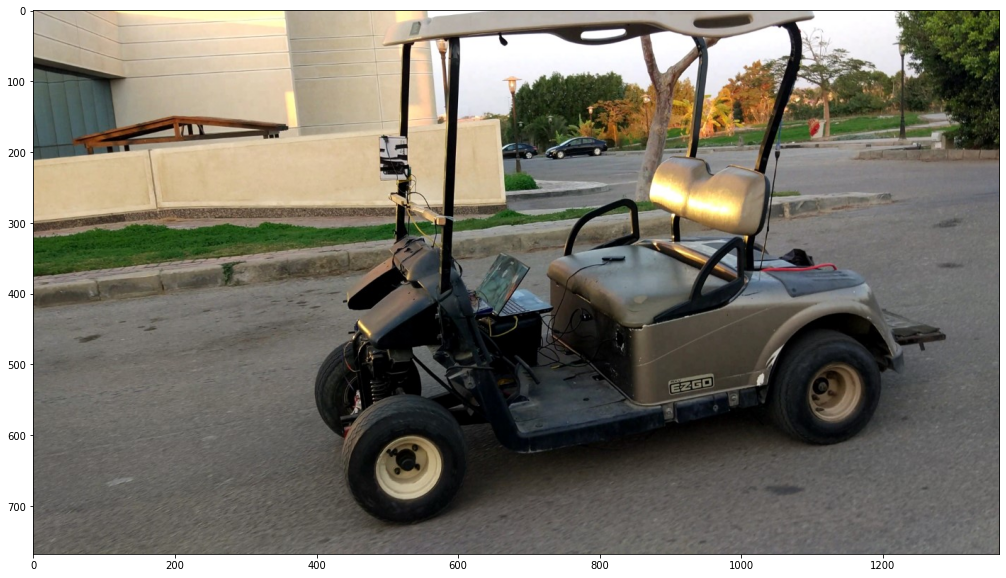

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../Files/001.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(25, 10))
plt.imshow(img[:,:,::-1]);

In [3]:
# Detect Edges
edges = cv2.Canny(gray, 50, 200)
# Get Lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 300)

In [4]:
print (lines)

[[[210.          1.4835298]]

 [[192.          1.5009831]]

 [[199.          1.5009831]]

 [[374.          1.4660766]]

 [[ 78.          1.5184364]]

 [[279.          1.5707964]]

 [[296.          1.4660766]]

 [[182.          1.5184364]]

 [[299.          1.553343 ]]

 [[176.          1.5358897]]

 [[388.          1.2915436]]

 [[104.          1.5009831]]

 [[397.          1.2740903]]

 [[394.          1.2915436]]

 [[186.          1.5184364]]

 [[400.          1.2740903]]

 [[385.          1.3089969]]

 [[164.          1.553343 ]]

 [[379.          1.3089969]]

 [[ 46.          1.553343 ]]

 [[389.          1.3089969]]

 [[169.          1.553343 ]]]


## What does this represents ?

## How we will draw a lines from this ?

In [6]:
def nothing(x):
    pass

cv2.namedWindow('Hough', cv2.WINDOW_NORMAL)

cv2.createTrackbar('x', 'Hough', 300, 500, nothing)

edges = cv2.Canny(gray, 50, 200)

while 1:
    image = img.copy()
    x = cv2.getTrackbarPos('x','Hough')
    lines = cv2.HoughLines(edges, 1, np.pi/180, x)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]

            x0 = rho * np.cos(theta)
            y0 = rho * np.sin(theta)

            a = np.cos(theta)
            b = np.sin(theta)

            x1 = int(x0 + 100 * (-b))
            y1 = int(y0 + 100 * (a))
            x2 = int(x0 - 100 * (-b))
            y2 = int(y0 - 100 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    edgesC = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    image = cv2.addWeighted(image, 0.9, edgesC, 0.5, 0)
    cv2.imshow('Hough', image)
    k = cv2.waitKey(1)
    if k == 27:
        break

cv2.destroyAllWindows()

In [9]:
def hough_line(img, angle_step=0.5, lines_are_white=True, value_threshold=5):
    """
    Hough transform for lines
    Input:
    img - 2D binary image with nonzeros representing edges
    angle_step - Spacing between angles to use every n-th angle
                 between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - array of angles used in computation, in radians.
    rhos - array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos

In [11]:
from math import hypot, pi, cos, sin
import numpy as np
import cv2 as cv
import math

img = np.zeros((200,200))

# Explore the following one by one
'''
for i in range(0, 200, 10):
    img[i, 199-i] = 255

for i in range(0, 200, 10):
    img[i, i] = 255
'''
for i in range(0, 200, 1):
    img[i, 100] = 255
'''
for i in range(0, 200, 10):
    img[100, i] = 255
'''

drawing = False
def draw_rect(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        img[y,x] = 255
    elif event == cv2.EVENT_MOUSEMOVE and drawing == True and y < img.shape[0] and x < img.shape[1]:
        img[y,x] = 255
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_rect)

while 1:
    cv2.imshow('Image', img)
    acc, thetas, rhos = hough_line(img)
    if acc.max() != 0 : acc = acc / acc.max()
    cv2.imshow('Acc', acc)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

## Hough Circles

In [1]:
import numpy as np
import cv2

def nothing(x):
    pass


img = cv2.imread('../Files/001.jpg',0)
img = cv2.medianBlur(img,5)


cv2.namedWindow('output')
cv2.createTrackbar('x', 'output', 1, 100, nothing)
cv2.createTrackbar('y', 'output', 20, 100, nothing)
cv2.createTrackbar('param1', 'output', 50, 100, nothing)
cv2.createTrackbar('param2', 'output', 30, 100, nothing)
cv2.createTrackbar('minR', 'output', 20, 100, nothing)
cv2.createTrackbar('maxR', 'output', 50, 100, nothing)

while 1:
    cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    x = cv2.getTrackbarPos('x', 'output')
    y = cv2.getTrackbarPos('y', 'output')
    param1 = cv2.getTrackbarPos('param1', 'output')
    param2 = cv2.getTrackbarPos('param2', 'output')
    minR = cv2.getTrackbarPos('minR', 'output')
    maxR = cv2.getTrackbarPos('maxR', 'output')

    if x < 1:
        x = 1
    if y < 1:
        y = 1
    if param1 < 1:
        param1 = 1
    if param2 < 1:
        param2 = 1
    if minR > maxR:
        minR = maxR - 1
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, x, y,
                            param1=param1,param2=param2,minRadius=minR,maxRadius=maxR)

    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0,:]:
            # draw the outer circle
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

    cv2.imshow('output', cimg)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()